In [54]:
# Tratamiento de datos
import numpy as np
import pandas as pd

# Graficos
import matplotlib.pyplot as plt

# Preprocesado y modelado
from sklearn.decomposition import PCA
from sklearn.preprocessing import StandardScaler
from sklearn.pipeline import make_pipeline
from numpy import linalg as LA
from sklearn import preprocessing

# Lectura de archivos
import os

os.chdir("./")

df = pd.read_csv("iris.csv")

In [56]:
df.head()

,sepal.length,sepal.width,petal.length,petal.width,variety
0,5.1,3.5,1.4,0.2,Setosa
1,4.9,3.0,1.4,0.2,Setosa
2,4.7,3.2,1.3,0.2,Setosa
3,4.6,3.1,1.5,0.2,Setosa
4,5.0,3.6,1.4,0.2,Setosa


In [58]:
index = df.index
renglones = len(index)
renglones

150

In [60]:
df["variety"].unique()

array(['Setosa', 'Versicolor', 'Virginica'], dtype=object)

In [62]:
df2 = df.set_index('variety')
df2

,sepal.length,sepal.width,petal.length,petal.width
variety,,,,
Setosa,5.1,3.5,1.4,0.2
Setosa,4.9,3.0,1.4,0.2
Setosa,4.7,3.2,1.3,0.2
Setosa,4.6,3.1,1.5,0.2
Setosa,5.0,3.6,1.4,0.2
...,...,...,...,...
Virginica,6.7,3.0,5.2,2.3
Virginica,6.3,2.5,5.0,1.9
Virginica,6.5,3.0,5.2,2.0


In [66]:
# df_labeled = preprocessing.LabelEncoder()
# df_labeled.fit(['Setosa', 'Versicolor', 'Virginica'])

# df2['variety'] = df_labeled.transform(df2['variety'])

# df2

In [68]:
# Estandarizacion
df_scaled = StandardScaler().fit_transform(df2)
df_scaled

array([[-9.00681170e-01,  1.01900435e+00, -1.34022653e+00,
        -1.31544430e+00],
       [-1.14301691e+00, -1.31979479e-01, -1.34022653e+00,
        -1.31544430e+00],
       [-1.38535265e+00,  3.28414053e-01, -1.39706395e+00,
        -1.31544430e+00],
       [-1.50652052e+00,  9.82172869e-02, -1.28338910e+00,
        -1.31544430e+00],
       [-1.02184904e+00,  1.24920112e+00, -1.34022653e+00,
        -1.31544430e+00],
       [-5.37177559e-01,  1.93979142e+00, -1.16971425e+00,
        -1.05217993e+00],
       [-1.50652052e+00,  7.88807586e-01, -1.34022653e+00,
        -1.18381211e+00],
       [-1.02184904e+00,  7.88807586e-01, -1.28338910e+00,
        -1.31544430e+00],
       [-1.74885626e+00, -3.62176246e-01, -1.34022653e+00,
        -1.31544430e+00],
       [-1.14301691e+00,  9.82172869e-02, -1.28338910e+00,
        -1.44707648e+00],
       [-5.37177559e-01,  1.47939788e+00, -1.28338910e+00,
        -1.31544430e+00],
       [-1.26418478e+00,  7.88807586e-01, -1.22655167e+00,
      

In [70]:
# Calculo de la matriz de correlaciónes para la matriz transformada
A = (1/renglones) * np.dot(df_scaled.T, df_scaled)
A

array([[ 1.        , -0.11756978,  0.87175378,  0.81794113],
       [-0.11756978,  1.        , -0.4284401 , -0.36612593],
       [ 0.87175378, -0.4284401 ,  1.        ,  0.96286543],
       [ 0.81794113, -0.36612593,  0.96286543,  1.        ]])

In [72]:
# Entrenamiento del modelo PCA con escalado de los datos
pca_pipe = make_pipeline(StandardScaler(), PCA())
pca_pipe.fit(df2)

# Se extrae el modelo entrenado del pipeline
modelo_pca = pca_pipe.named_steps['pca']

print("Eigenvalores:")
results = LA.eigvals(A)
print(results)

Eigenvalores:
[2.91849782 0.91403047 0.14675688 0.02071484]


In [74]:
# Porcentaje de la varianza explicada por cada nuevo componente
print("Porcentaje de varianza explicada por componente")
print(modelo_pca.explained_variance_ratio_)

Porcentaje de varianza explicada por componente
[0.72962445 0.22850762 0.03668922 0.00517871]


In [78]:
# Calculo de eigenvectores
print("Eigenvectores por renglon:")
pd.DataFrame(data = modelo_pca.components_,
            columns = df2.columns,
            index = ["PC1", "PC2", "PC3", "PC4"])

Eigenvectores por renglon:


,sepal.length,sepal.width,petal.length,petal.width
PC1,0.521066,-0.269347,0.580413,0.564857
PC2,0.377418,0.923296,0.024492,0.066942
PC3,-0.719566,0.244382,0.142126,0.634273
PC4,-0.261286,0.123510,0.801449,-0.523597


In [80]:
# Proyecciones de los componentes
proyecciones = np.dot(modelo_pca.components_, df_scaled.T)
proyecciones = pd.DataFrame(proyecciones, index = ["PC1", "PC2", "PC3", "PC4"])
proyecciones = proyecciones.transpose().set_index(df2.index)
proyecciones

,PC1,PC2,PC3,PC4
variety,,,,
Setosa,-2.264703,0.480027,-0.127706,-0.024168
Setosa,-2.080961,-0.674134,-0.234609,-0.103007
Setosa,-2.364229,-0.341908,0.044201,-0.028377
Setosa,-2.299384,-0.597395,0.091290,0.065956
Setosa,-2.389842,0.646835,0.015738,0.035923
...,...,...,...,...
Virginica,1.870503,0.386966,0.256274,-0.389257
Virginica,1.564580,-0.896687,-0.026371,-0.220192
Virginica,1.521170,0.269069,0.180178,-0.119171


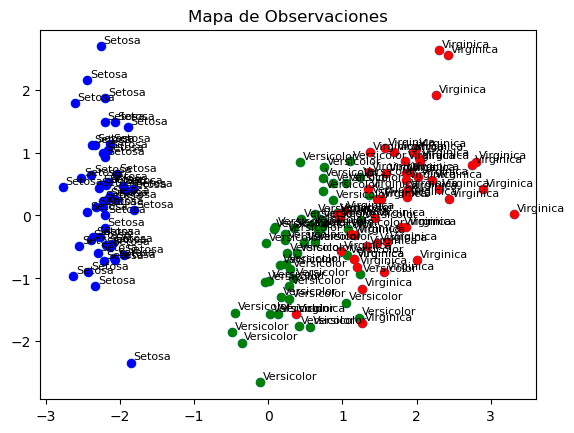

In [102]:
x = proyecciones.iloc[:, 0]
y = proyecciones.iloc[:, 1]
z = df2.index
x = x.to_numpy()
y = y.to_numpy()

color_map = {
    'Setosa': 'blue',
    'Versicolor': 'green',
    'Virginica': 'red'
}

fig, ax = plt.subplots()
ax.set_title("Mapa de Observaciones")
ax.scatter(x,y)

for i, txt in enumerate(z):
    ax.scatter(x[i], y[i], color=color_map.get(txt, 'gray'), s=30)
    ax.annotate(txt, (x[i], y[i]), fontsize=8, xytext=(2, 2), textcoords='offset points')

In [104]:
componentes_2 = pd.DataFrame(data = modelo_pca.components_,
                            columns = df2.columns,
                            index = ["PC1", "PC2", "PC3", "PC4"])
componentes_2 = componentes_2.iloc[0:2, :]
componentes_2 = componentes_2.T
componentes_2

,PC1,PC2
sepal.length,0.521066,0.377418
sepal.width,-0.269347,0.923296
petal.length,0.580413,0.024492
petal.width,0.564857,0.066942


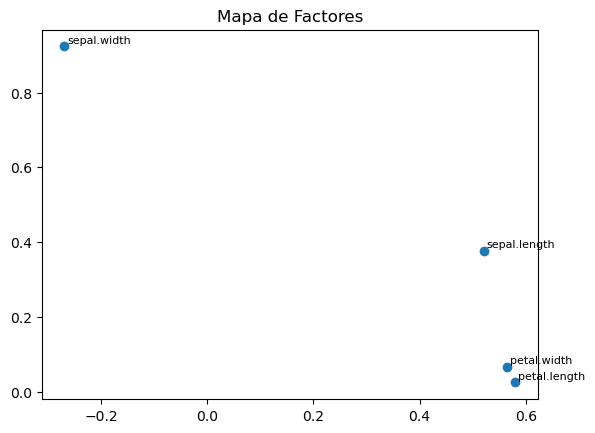

In [108]:
x = componentes_2.iloc[:, 0]
y = componentes_2.iloc[:, 1]
z = componentes_2.index
x = x.to_numpy()
y = y.to_numpy()

fig, ax = plt.subplots()
ax.set_title("Mapa de Factores")
ax.scatter(x,y)

for i, txt in enumerate(z):
    ax.annotate(txt, (x[i], y[i]), fontsize=8, xytext=(2, 2), textcoords='offset points')

In [110]:
# Obtencion de la matriz estandarizada original
original = np.dot(modelo_pca.components_.T, proyecciones.T)
original = original.T
print(original)

[[-9.00681170e-01  1.01900435e+00 -1.34022653e+00 -1.31544430e+00]
 [-1.14301691e+00 -1.31979479e-01 -1.34022653e+00 -1.31544430e+00]
 [-1.38535265e+00  3.28414053e-01 -1.39706395e+00 -1.31544430e+00]
 [-1.50652052e+00  9.82172869e-02 -1.28338910e+00 -1.31544430e+00]
 [-1.02184904e+00  1.24920112e+00 -1.34022653e+00 -1.31544430e+00]
 [-5.37177559e-01  1.93979142e+00 -1.16971425e+00 -1.05217993e+00]
 [-1.50652052e+00  7.88807586e-01 -1.34022653e+00 -1.18381211e+00]
 [-1.02184904e+00  7.88807586e-01 -1.28338910e+00 -1.31544430e+00]
 [-1.74885626e+00 -3.62176246e-01 -1.34022653e+00 -1.31544430e+00]
 [-1.14301691e+00  9.82172869e-02 -1.28338910e+00 -1.44707648e+00]
 [-5.37177559e-01  1.47939788e+00 -1.28338910e+00 -1.31544430e+00]
 [-1.26418478e+00  7.88807586e-01 -1.22655167e+00 -1.31544430e+00]
 [-1.26418478e+00 -1.31979479e-01 -1.34022653e+00 -1.44707648e+00]
 [-1.87002413e+00 -1.31979479e-01 -1.51073881e+00 -1.44707648e+00]
 [-5.25060772e-02  2.16998818e+00 -1.45390138e+00 -1.31544430e

In [116]:
df2.loc['Setosa'].head()

,sepal.length,sepal.width,petal.length,petal.width
variety,,,,
Setosa,5.1,3.5,1.4,0.2
Setosa,4.9,3.0,1.4,0.2
Setosa,4.7,3.2,1.3,0.2
Setosa,4.6,3.1,1.5,0.2
Setosa,5.0,3.6,1.4,0.2


In [118]:
df2.loc['Virginica'].head()

,sepal.length,sepal.width,petal.length,petal.width
variety,,,,
Virginica,6.3,3.3,6.0,2.5
Virginica,5.8,2.7,5.1,1.9
Virginica,7.1,3.0,5.9,2.1
Virginica,6.3,2.9,5.6,1.8
Virginica,6.5,3.0,5.8,2.2


In [120]:
df2.loc['Versicolor'].head()

,sepal.length,sepal.width,petal.length,petal.width
variety,,,,
Versicolor,7.0,3.2,4.7,1.4
Versicolor,6.4,3.2,4.5,1.5
Versicolor,6.9,3.1,4.9,1.5
Versicolor,5.5,2.3,4.0,1.3
Versicolor,6.5,2.8,4.6,1.5
